In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
import sklearn as skl

"""
!pip install squarify
!pip install circlify
"""

import squarify as sq
import circlify as crl
import seaborn as sns

diamonds = sns.load_dataset('diamonds',cache=True,data_home=None)
diamondsForReplace = sns.load_dataset('diamonds',cache=True,data_home=None)
diamondsForReplace2 = sns.load_dataset('diamonds',cache=True,data_home=None)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


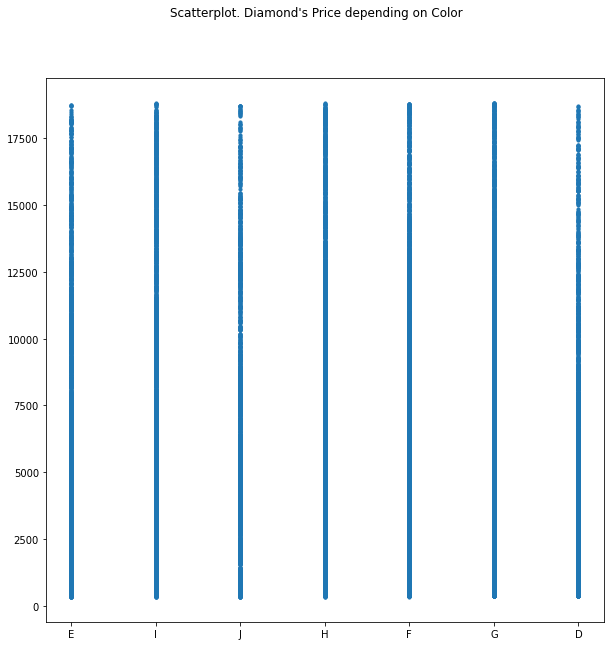

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle("Scatterplot. Diamond's Price depending on Color")
plt.scatter(diamonds["color"], diamonds["price"], s=10)

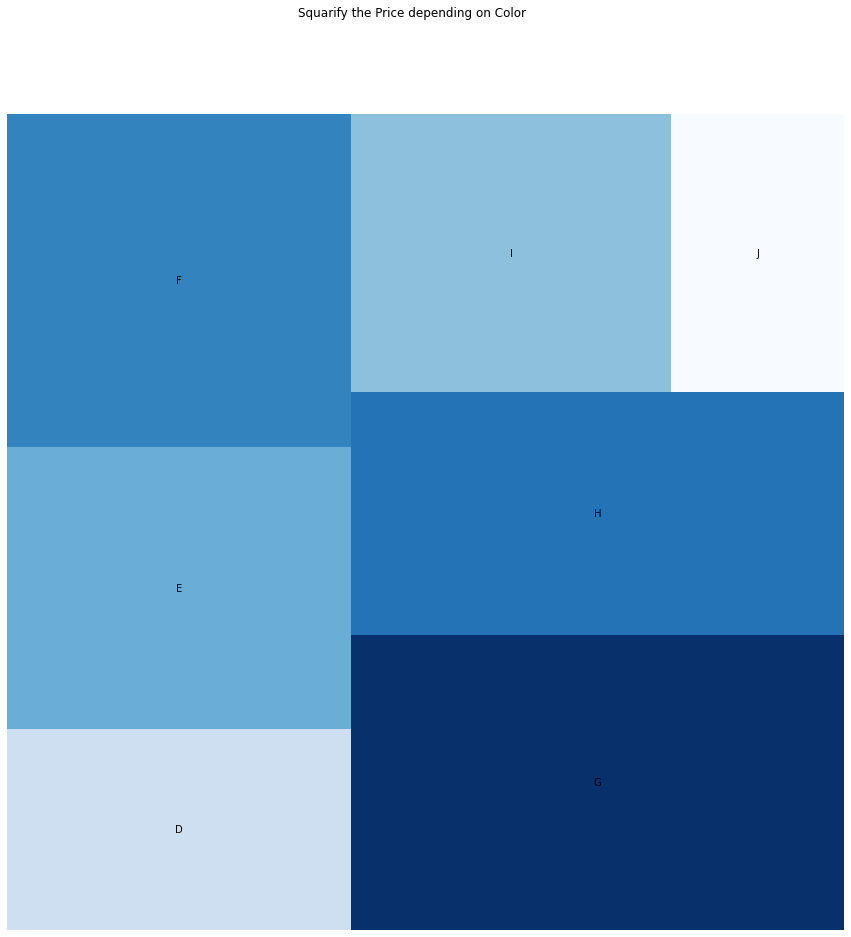

In [ ]:
categs = diamonds.groupby('color')[['price']].sum()
cmap = mpl.cm.Blues
minimum = min(categs['price'])
maximum = max(categs['price'])
norm = mpl.colors.Normalize(vmin=minimum, vmax=maximum)
colors = [cmap(norm(value)) for value in categs['price']]
plt.figure(figsize=(15,15))
sq.plot(sizes=categs.values,label=categs.index,color=colors)
plt.axis('off')
plt.suptitle("Squarify the Price depending on Color")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


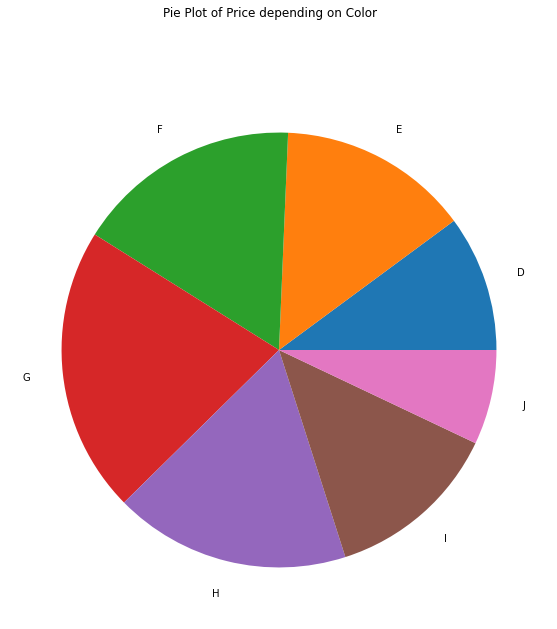

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(categs.values, labels=categs.index, labeldistance=1.15)
plt.suptitle("Pie Plot of Price depending on Color")
plt.show()

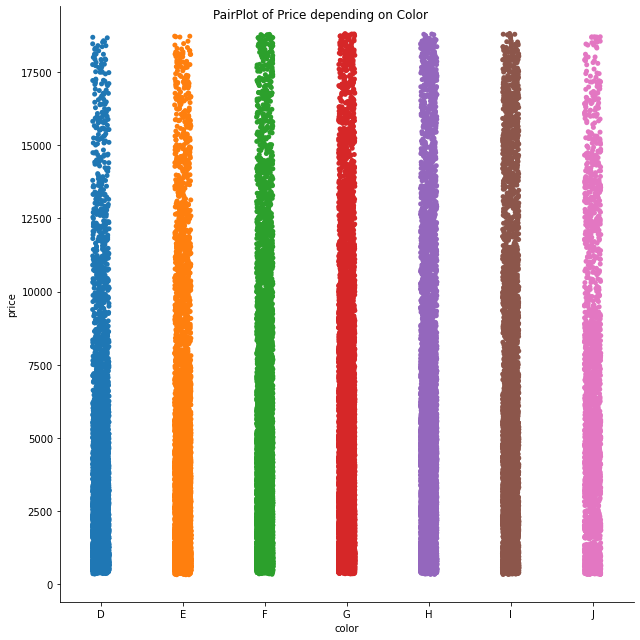

In [ ]:
sns.catplot(x="color",y="price",data=diamonds,height=9)
plt.suptitle("PairPlot of Price depending on Color")
plt.show()

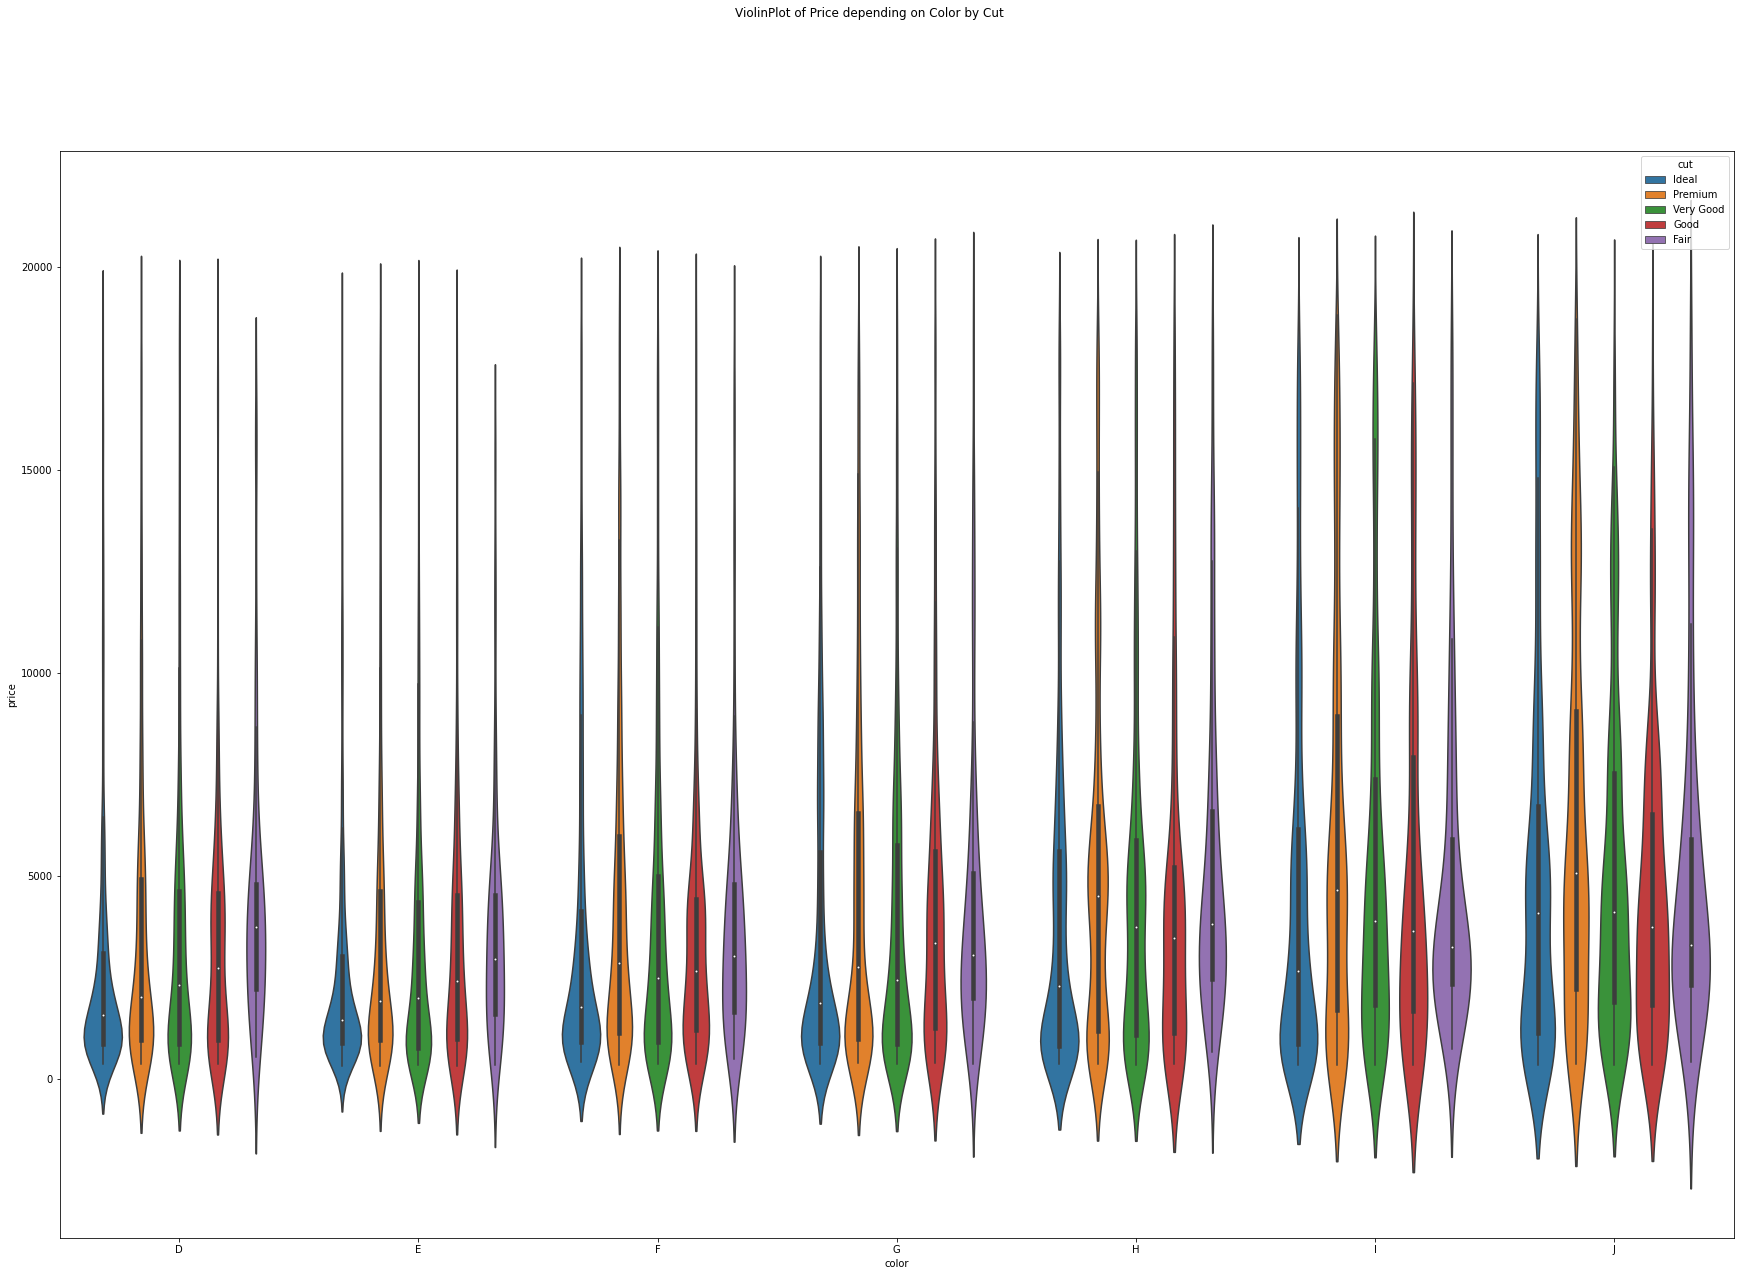

In [ ]:
plt.figure(figsize=(30,20))
sns.violinplot(x="color",y="price",hue="cut",data=diamonds)
plt.suptitle("ViolinPlot of Price depending on Color by Cut")
plt.show()

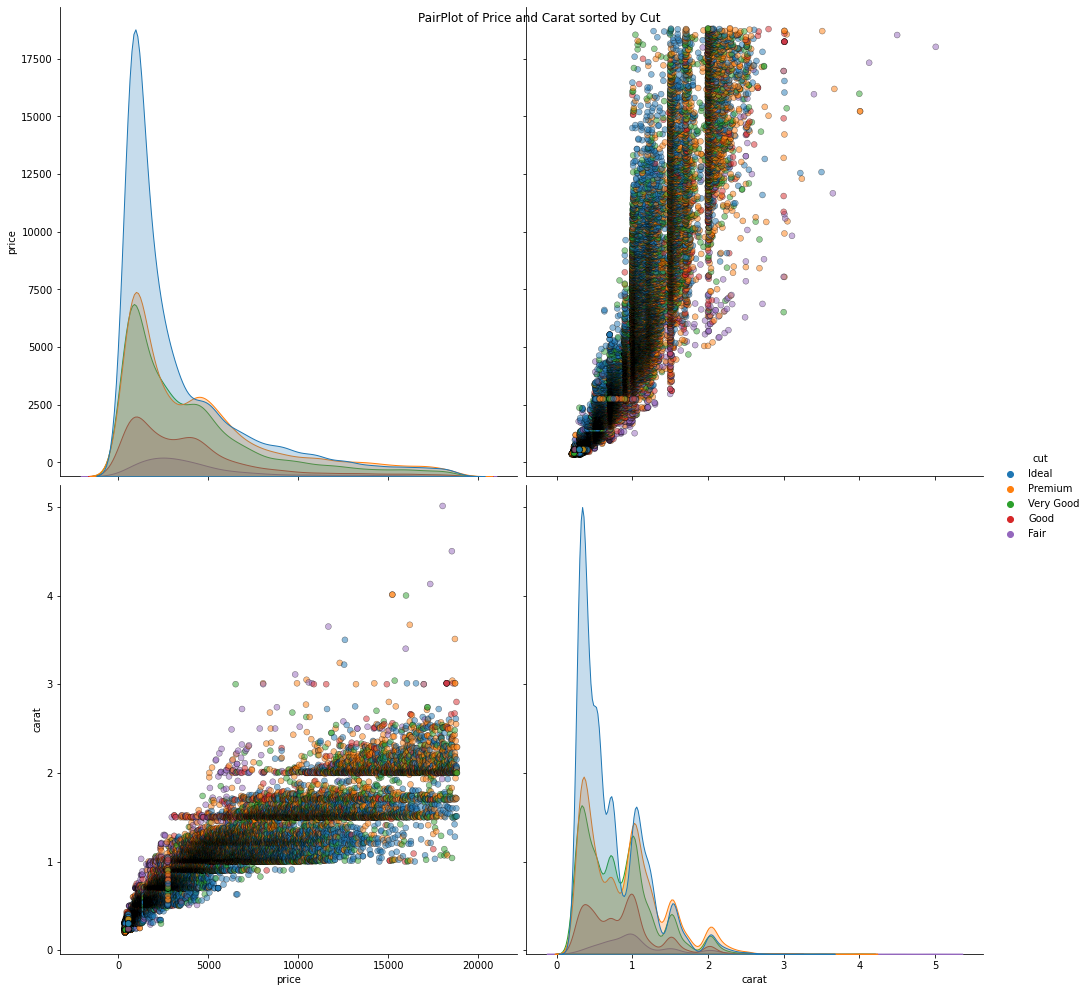

In [ ]:
sns.pairplot(diamonds,vars = ['price', 'carat'],hue = 'cut',diag_kind = 'kde', 
             plot_kws = {'alpha': 0.5, 's': 35, 'edgecolor': 'k'},height = 7)
plt.suptitle('PairPlot of Price and Carat sorted by Cut')
plt.show()

In [ ]:
def replaceCut(stri):
  if stri == "Ideal":
    stri = "1"
  elif stri == "Premium":
    stri = "2"
  elif stri == "Very Good":
    stri = "3"
  elif stri == "Good":
    stri = "4"
  else:
    stri = "5"
  return stri

def replaceColor(stri):
  if stri == "D":
    stri = "1"
  elif stri == "E":
    stri = "2"
  elif stri == "F":
    stri = "3"
  elif stri == "G":
    stri = "4"
  elif stri == "H":
    stri = "5"
  elif stri == "I":
    stri = "6"
  else:
    stri = "7" 
  return stri

def replaceClarity(stri):
  if stri == "FL":
    stri = "1"
  elif stri == "IF":
    stri = "2"
  elif stri == "VVS1":
    stri = "3"
  elif stri == "VVS2":
    stri = "4"
  elif stri == "VS1":
    stri = "5"
  elif stri == "VS2":
    stri = "6"
  elif stri == "SI1":
    stri = "7"
  elif stri == "SI2":
    stri = "8"
  elif stri == "SI3":
    stri = "9"
  elif stri == "I1":
    stri = "10"
  elif stri == "I2":
    stri = "11"
  else:
    stri = "12"
  return stri

diamondsForReplace["color"] = diamondsForReplace["color"].apply(replaceColor)
diamondsForReplace["color"] = diamondsForReplace["color"].astype(int)
diamondsForReplace["clarity"] = diamondsForReplace["clarity"].apply(replaceClarity)
diamondsForReplace["clarity"] = diamondsForReplace["clarity"].astype(int)
diamondsForReplace.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,2,8,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,2,7,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,6,6,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,7,8,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
X = diamondsForReplace[["carat","color","clarity","depth","table","price","x","y","z"]].copy()
y = diamondsForReplace['cut'].copy()

X.head()

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,2,8,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,7,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,6,6,62.4,58.0,334,4.20,4.23,2.63
4,0.31,7,8,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[ 193   45   20   56    6]
 [  22  101  197  428  235]
 [   0    1 3689  535   34]
 [   1    1  528 2247   13]
 [   1   28  827 1357  223]]
Accuracy 0.5981646273637374


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
model = LinearDiscriminantAnalysis()
model.fit(X,y)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.6158633049066863


In [ ]:
diamondsForReplace2["color"] = diamondsForReplace2["color"].apply(replaceColor)
diamondsForReplace2["color"] = diamondsForReplace2["color"].astype('int64')
diamondsForReplace2["clarity"] = diamondsForReplace2["clarity"].apply(replaceClarity)
diamondsForReplace2["clarity"] = diamondsForReplace2["clarity"].astype('int64')
diamondsForReplace2["cut"] = diamondsForReplace2["cut"].apply(replaceCut)
diamondsForReplace2["cut"] = diamondsForReplace2["cut"].astype('int64')

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


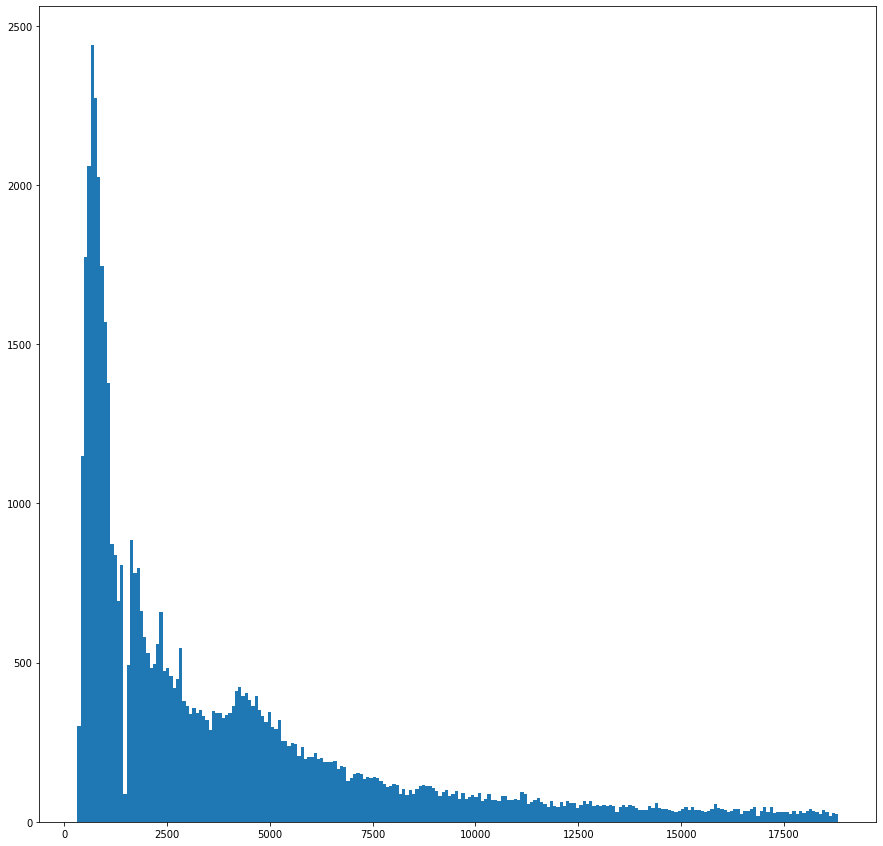

In [ ]:
plt.figure(figsize=(15,15))
plt.hist(diamonds["price"],bins=232)
plt.show()

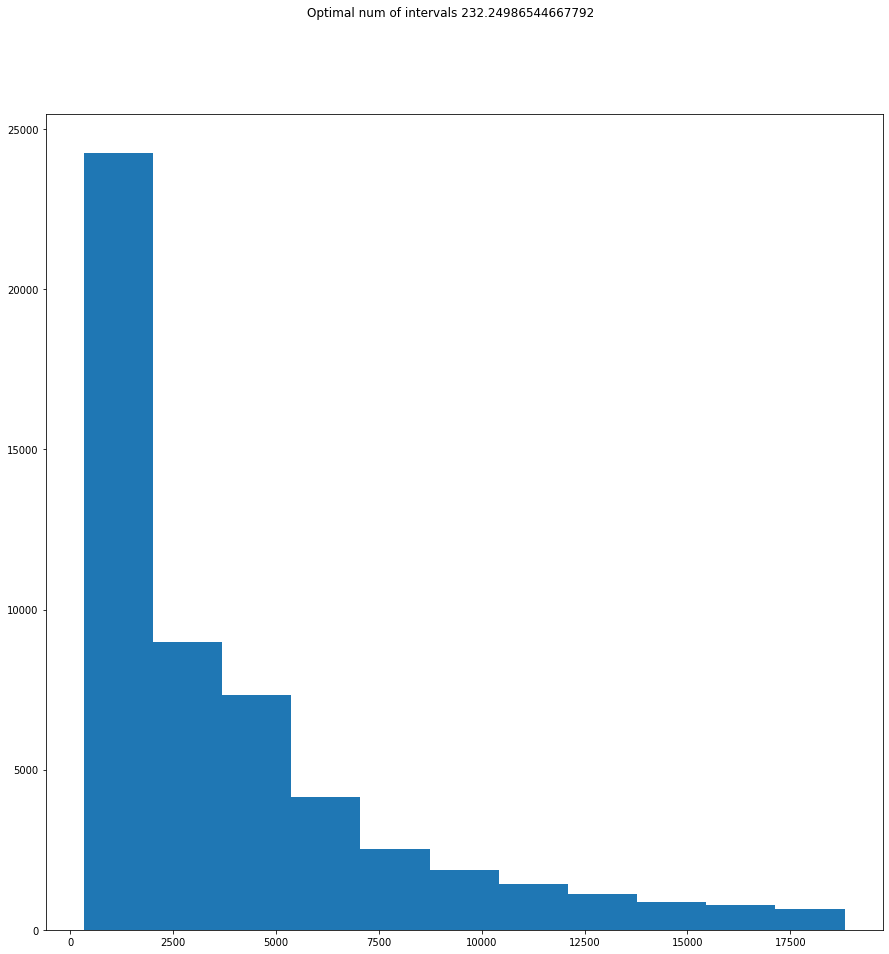

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,2,8,61.5,55.0,Lowest,3.95,3.98,2.43
1,0.21,2,2,7,59.8,61.0,Lowest,3.89,3.84,2.31
2,0.23,4,2,5,56.9,65.0,Lowest,4.05,4.07,2.31
3,0.29,2,6,6,62.4,58.0,Lowest,4.20,4.23,2.63
4,0.31,4,7,8,63.3,58.0,Lowest,4.34,4.35,2.75


In [ ]:
import math
n=53940
minimum = min(diamondsForReplace2['price'])
maximum = max(diamondsForReplace2['price'])
range=int(maximum)-int(minimum)
interNum=math.sqrt(n)
interLen=range/11

plt.figure(figsize=(15,15))
plt.hist(diamonds["price"],bins=11)
plt.suptitle("Optimal num of intervals " + str(interNum))
plt.show()

def replacePrice(stri):
  fst=minimum
  snd=fst+interLen
  trd=snd+interLen
  frth=trd+interLen
  fth=frth+interLen
  sth=fth+interLen
  svth=sth+interLen
  eth=svth+interLen
  nth=eth+interLen
  tth=nth+interLen
  elth=tth+interLen
  twth=maximum-elth

  stri=int(stri)
  if stri >= fst and stri < snd :
    stri = "Lowest"
  elif stri >= snd and stri < trd:
    stri = "VeryLow"
  elif stri >= trd and stri < frth:
    stri = "Low"
  elif stri >= frth and stri < fth:
    stri = "LowLowMid"
  elif stri >= fth and stri < sth:
    stri = "LowMid"
  elif stri >= sth and stri < svth:
    stri = "Mid"
  elif stri >= svth and stri < eth:
    stri = "UpMid"
  elif stri >= eth and stri < nth:
    stri = "UpUpMid"
  elif stri >= nth and stri < tth:
    stri = "High"
  elif stri >= tth and stri < elth:
    stri = "VeryHigh"
  else:
    stri = "Highest"
  return stri

diamondsForReplace2["price"] = diamondsForReplace2["price"].apply(replacePrice)
diamondsForReplace2["price"] = diamondsForReplace2["price"].astype('category')
diamondsForReplace2.head()

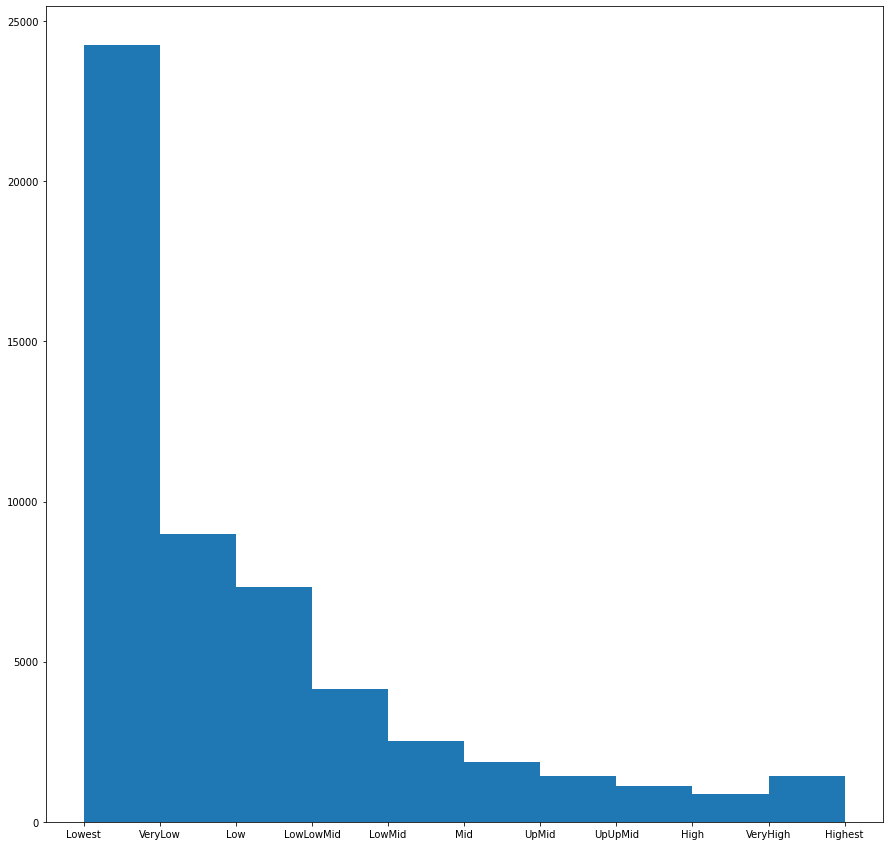

In [ ]:
plt.figure(figsize=(15,15))
plt.hist(diamondsForReplace2["price"])
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

X = diamondsForReplace2[["carat", "cut","color","clarity","depth","table","x","y","z"]].copy()
y = diamondsForReplace2['price'].copy()
model = LinearDiscriminantAnalysis()
model.fit(X,y)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.7554381411444814


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', random_state=0, penalty='none')
log_reg.fit(X, y)
print(log_reg.score(X,y))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7076195773081201


In [ ]:
"""
Latter has to be run each time I restart this Colab notebook
"""
"""
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

!kaggle datasets download -d zalando-research/fashionmnist
!unzip \*.zip && rm *.zip
"""
test = pd.read_csv('/content/gdrive/My Drive/Kaggle/fashion-mnist_test.csv')
train = pd.read_csv('/content/gdrive/My Drive/Kaggle/fashion-mnist_train.csv')
train.head()

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
labels=train['label'].tolist()
classes=len(np.unique(labels))
features=np.size(train,axis=1)
print(train.shape)
print(classes)
print(features)

(60000, 785)
10
785


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train=train.iloc[:,1:785]
y_train=train.iloc[:,0]
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_r2 = lda.fit(X_train, y_train).transform(X_train)

y_test=test.iloc[:,0]
X_test=test.iloc[:,1:785]
from sklearn.metrics import accuracy_score
y_pred = lda.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8256


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 358.9 MB


In [ ]:
testNP = pd.DataFrame(test).to_numpy()
trainNP = pd.DataFrame(train).to_numpy()
trainNP

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

(784, 784)
(60000, 2)


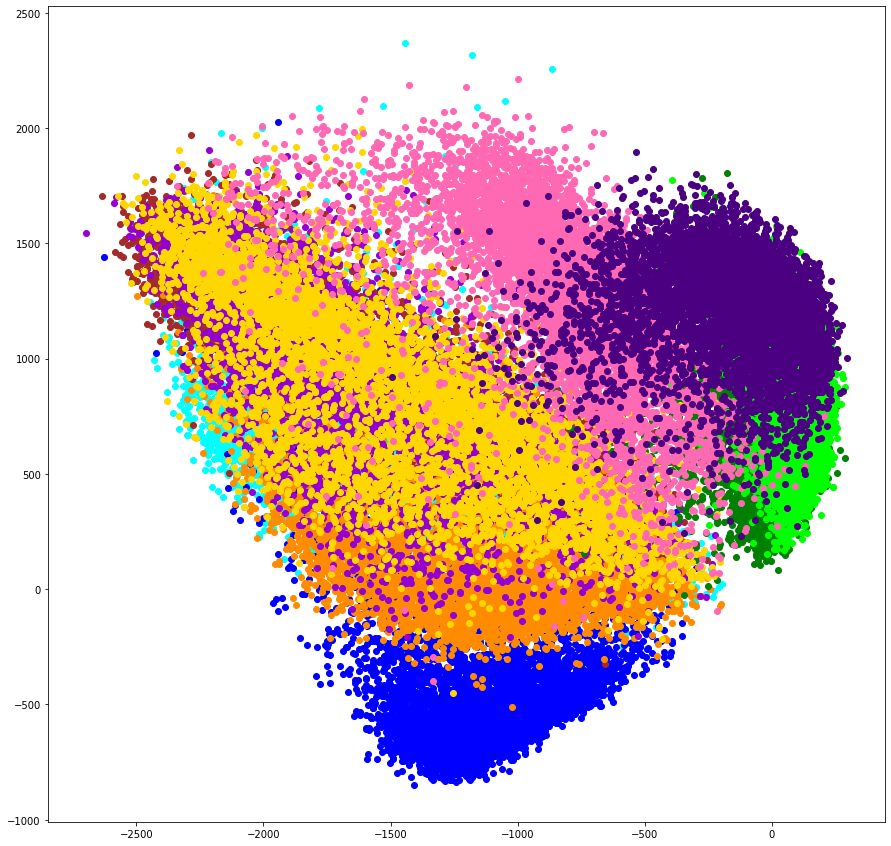

In [ ]:
X_trainNP = trainNP[:,1:785]
y_trainNP = trainNP[:,0]
y_testNP = testNP[:,0]
X_testNP = testNP[:,1:785]

height, width = X_trainNP.shape
unique_classes = np.unique(y_trainNP)
num_class = len(unique_classes)

scatter_t = np.cov(X_trainNP.T)*(height-1)
scatter_w = 0
for i in unique_classes:
  class_items = np.flatnonzero(y_trainNP == unique_classes[i])
  length = len(class_items)
  scatter_w = scatter_w + np.cov(X_trainNP[class_items].T) * (length - 1)
        
scatter_b = scatter_t-scatter_w
_, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
print(eig_vectors.shape)
pc = X_trainNP.dot(eig_vectors[:,::-1][:,:2])
print(pc.shape)

plt.figure(figsize=(15,15))
colors = ['aqua','blue','brown','darkorange','darkviolet','green','gold','lime','hotpink','indigo']
labels = np.unique(y_trainNP)
for color, label in zip(colors, labels):
  class_data = pc[np.flatnonzero(y_trainNP == label)]
  plt.scatter(class_data[:,0],class_data[:,1],c=color)
plt.show()

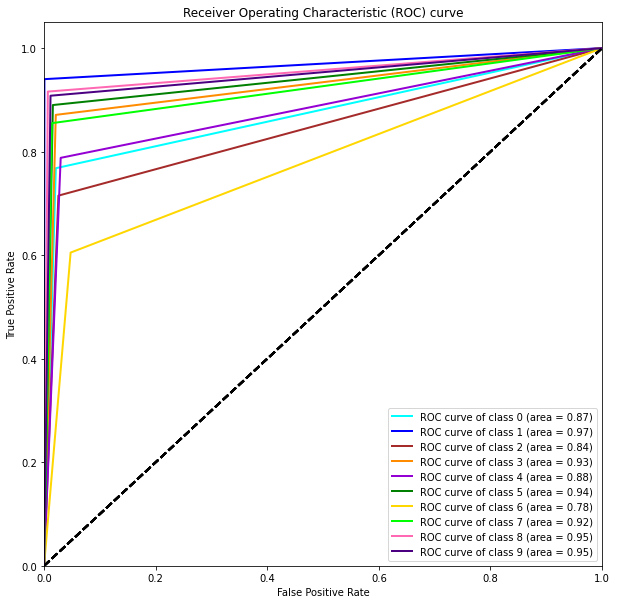

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

model2 = LinearDiscriminantAnalysis()
model2.fit(X_trainNP,y_trainNP)

y_pred = model2.predict(X_testNP)

unique_classes = np.unique(y_testNP)
n_classes = len(np.unique(y_testNP))
y_testN = label_binarize(y_test, classes=np.arange(n_classes))
y_predN = label_binarize(y_pred, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

temp = 0
while(not temp==n_classes):
  fpr[temp], tpr[temp], _ = roc_curve(y_testN[:, temp], y_predN[:, temp])
  roc_auc[temp] = auc(fpr[temp], tpr[temp])
  temp = temp + 1

# Plot all ROC curves
plt.figure(figsize=(10,10))
lw = 2
colors = ['aqua','blue','brown','darkorange','darkviolet','green','gold','lime','hotpink','indigo']
for i, color in zip(unique_classes, colors):
  plt.plot(fpr[i], tpr[i], color=color, lw=lw, label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)
  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic (ROC) curve")
  plt.legend()